In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Market Sales Analysis for Client ABC 

Problem Statement

The client ABC is a US based large retailer of apparel and accessories. ABC management is planning to expand their business by opening more shops in different locations across the US. Details of the existing shops are available in the data source shared. Perform the necessary data analysis and summarize the insights to answer the questions listed below.

Data Exploration
Dataset          
The data contains the sales of and other characteristics of 691 stores from 2015 to 2020. The sales column corresponds to average monthly sales at the store during this period.

Dataset: DS Internship – EDA – Data.xlsx



Data Analysis and Insights Generation
      
Please analyse the data to answer the following questions: 

Initial Exploration: 

```
Find total sales by year.

Number of stores opened in the year 1991.

How many stores were remodelled during this period? (Consider all types of remodelling)

Find the direct relationship (if any) between Sales and total sq. ft.

Which Super division is most profitable?

How many stores are active as of today?

Which super division has more sq. ft on an average across all the stores?
```

In [2]:
df = pd.read_excel("DS Internship - EDA - Data.xlsx",parse_dates = True)

In [3]:
df

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181232,830,2017,6,BOYS,44711.93,10797.28,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181233,830,2017,6,ACCESSORIES,33539.67,15998.07,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181234,830,2017,6,KIDS,11648.04,12042.24,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181235,830,2017,7,BOYS,11455.42,12107.08,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation


In [4]:
df.columns

Index(['Store', 'Year', 'Month', 'Super Division', 'Sales', 'SGM',
       'Store Open', 'Store Close', 'Outlet Type', 'State', 'Climate',
       'Total Sq Ft', 'Store Modification Date', 'Store Modification'],
      dtype='object')

In [5]:
df.dtypes

Store                               int64
Year                                int64
Month                               int64
Super Division                     object
Sales                             float64
SGM                               float64
Store Open                 datetime64[ns]
Store Close                        object
Outlet Type                        object
State                              object
Climate                            object
Total Sq Ft                       float64
Store Modification Date            object
Store Modification                 object
dtype: object

In [6]:
df.isnull().sum()

Store                      0
Year                       0
Month                      0
Super Division             0
Sales                      0
SGM                        0
Store Open                 0
Store Close                0
Outlet Type                0
State                      0
Climate                    0
Total Sq Ft                0
Store Modification Date    0
Store Modification         0
dtype: int64

 TOTAL SALES BY YEAR

In [7]:
df.groupby(['Year'])['Sales'].sum()

Year
2015    1.627585e+09
2016    1.843939e+09
2017    1.651322e+09
2018    1.492340e+09
2019    1.471963e+09
2020    6.510899e+07
Name: Sales, dtype: float64

<AxesSubplot: xlabel='Year'>

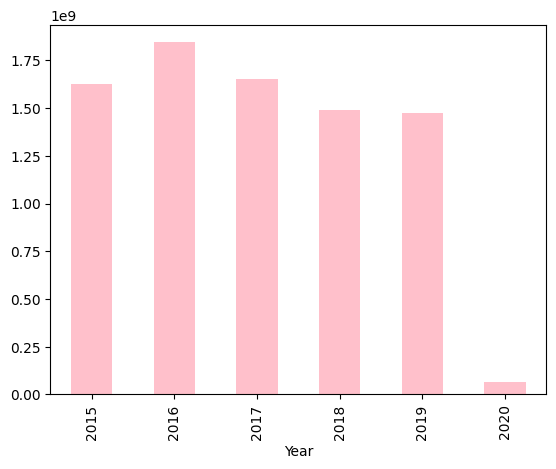

In [128]:
df.groupby(['Year'])['Sales'].sum().plot(kind = "bar",color = "pink")

STORES OPENED IN 1991

In [12]:
df['Store Open'] = pd.DatetimeIndex(df['Store Open'].values)

In [16]:
df['Store Open Year'] = df['Store Open'].dt.year

In [19]:
df[df['Store Open Year'] == 1991]

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification,Store Open Year
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174114,768,2017,5,KIDS,11626.41,12172.32,1991-08-08,2017-06-19 00:00:00,Mall,A7,Cold,7050.5,2013-11-15 00:00:00,relocation,1991
174115,768,2017,6,GIRLS,46957.90,23170.18,1991-08-08,2017-06-19 00:00:00,Mall,A7,Cold,7050.5,2013-11-15 00:00:00,relocation,1991
174116,768,2017,6,BOYS,24657.88,13632.78,1991-08-08,2017-06-19 00:00:00,Mall,A7,Cold,7050.5,2013-11-15 00:00:00,relocation,1991
174117,768,2017,6,ACCESSORIES,27693.89,15896.78,1991-08-08,2017-06-19 00:00:00,Mall,A7,Cold,7050.5,2013-11-15 00:00:00,relocation,1991


In [39]:
df[df['Store Open Year'] == 1991]['Store'].unique()

array([  1,   4,  10, 768], dtype=int64)

In [40]:
len(df[df['Store Open Year'] == 1991]['Store'].unique())

4

stores that were remodelled during (Consider all types of remodelling)

In [22]:
df["Store Modification"].unique()

array(['relocation', 'remodel', 'no change', 'expansion'], dtype=object)

In [24]:
df[df["Store Modification"] == 'remodel']

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification,Store Open Year
234,2,2015,2,GIRLS,100075.59,58931.18,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09 00:00:00,remodel,1989
235,2,2015,2,BOYS,61762.20,37207.41,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09 00:00:00,remodel,1989
236,2,2015,2,ACCESSORIES,41837.01,26801.67,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09 00:00:00,remodel,1989
237,2,2015,2,KIDS,11463.50,12108.69,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09 00:00:00,remodel,1989
238,2,2015,3,GIRLS,89700.56,56955.35,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09 00:00:00,remodel,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180438,823,2017,6,ACCESSORIES,13235.94,10917.42,2005-07-14,2017-06-26 00:00:00,Mall,A2,Cold,4160.8,2016-11-04 00:00:00,remodel,2005
180439,823,2017,6,KIDS,13805.05,10825.40,2005-07-14,2017-06-26 00:00:00,Mall,A2,Cold,4160.8,2016-11-04 00:00:00,remodel,2005
180440,823,2017,7,GIRLS,11703.17,7873.14,2005-07-14,2017-06-26 00:00:00,Mall,A2,Cold,4160.8,2016-11-04 00:00:00,remodel,2005
180441,823,2017,7,ACCESSORIES,11463.74,12020.14,2005-07-14,2017-06-26 00:00:00,Mall,A2,Cold,4160.8,2016-11-04 00:00:00,remodel,2005


In [31]:
import warnings
warnings.filterwarnings("ignore")
remodel_df = df[df["Store Modification"] == 'remodel']
remodel_df["Store Modification Date"] = pd.DatetimeIndex(remodel_df["Store Modification Date"])
remodel_df["Store Modification Year"] = remodel_df["Store Modification Date"].dt.year
remodel_df

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification,Store Open Year,Store Modification Year
234,2,2015,2,GIRLS,100075.59,58931.18,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09,remodel,1989,2016
235,2,2015,2,BOYS,61762.20,37207.41,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09,remodel,1989,2016
236,2,2015,2,ACCESSORIES,41837.01,26801.67,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09,remodel,1989,2016
237,2,2015,2,KIDS,11463.50,12108.69,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09,remodel,1989,2016
238,2,2015,3,GIRLS,89700.56,56955.35,1989-05-01,No Close date,Mall,A2,Moderate,8068.0,2016-11-09,remodel,1989,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180438,823,2017,6,ACCESSORIES,13235.94,10917.42,2005-07-14,2017-06-26 00:00:00,Mall,A2,Cold,4160.8,2016-11-04,remodel,2005,2016
180439,823,2017,6,KIDS,13805.05,10825.40,2005-07-14,2017-06-26 00:00:00,Mall,A2,Cold,4160.8,2016-11-04,remodel,2005,2016
180440,823,2017,7,GIRLS,11703.17,7873.14,2005-07-14,2017-06-26 00:00:00,Mall,A2,Cold,4160.8,2016-11-04,remodel,2005,2016
180441,823,2017,7,ACCESSORIES,11463.74,12020.14,2005-07-14,2017-06-26 00:00:00,Mall,A2,Cold,4160.8,2016-11-04,remodel,2005,2016


In [46]:
remodel_df.groupby(['Store Modification Year'])['Store'].unique()

Store Modification Year
2007                                                [138]
2009                                                 [59]
2010                                    [62, 70, 74, 762]
2011                                           [789, 799]
2013                        [25, 100, 179, 212, 271, 774]
2014                                 [110, 166, 416, 425]
2016    [2, 83, 135, 291, 355, 356, 409, 761, 773, 785...
2017              [73, 118, 180, 270, 299, 399, 604, 701]
2019    [9, 10, 18, 26, 29, 31, 36, 40, 87, 93, 97, 12...
Name: Store, dtype: object

In [48]:
remodeledstores = remodel_df.groupby(['Store Modification Year'])['Store'].unique()
for year, stores in remodeledstores.items():
    print(f"Year {year}: {len(stores)}")

Year 2007: 1
Year 2009: 1
Year 2010: 4
Year 2011: 2
Year 2013: 6
Year 2014: 4
Year 2016: 15
Year 2017: 8
Year 2019: 35


<BarContainer object of 9 artists>

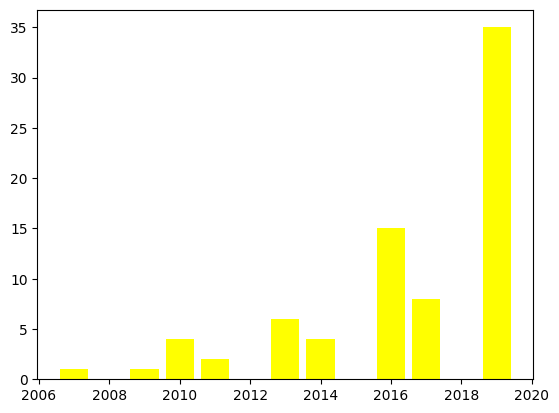

In [126]:
plt.bar(remodeledstores.keys(),[len(stores) for stores in remodeledstores.values],color = "yellow")

Relationship between Sales and Total Sqs. Feet:

In [61]:
rel_df = df.loc[:,["Sales","Total Sq Ft"]]

In [62]:
rel_df

,Sales,Total Sq Ft
0,63635.80,4735.0
1,20872.93,4735.0
2,38717.03,4735.0
3,11455.00,4735.0
4,67507.77,4735.0
...,...,...
181232,44711.93,5730.5
181233,33539.67,5730.5
181234,11648.04,5730.5
181235,11455.42,5730.5


Text(0, 0.5, 'Sales')

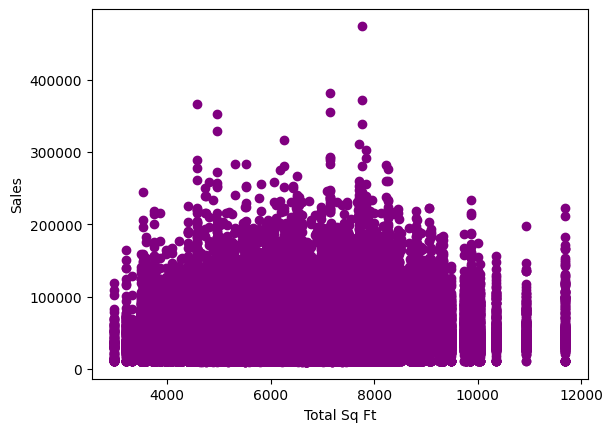

In [125]:
plt.scatter(rel_df["Total Sq Ft"],rel_df["Sales"],color = "purple")
plt.xlabel('Total Sq Ft')
plt.ylabel('Sales')

In [67]:
rel_df.corr()

,Sales,Total Sq Ft
Sales,1.000000,0.139225
Total Sq Ft,0.139225,1.000000


<AxesSubplot: >

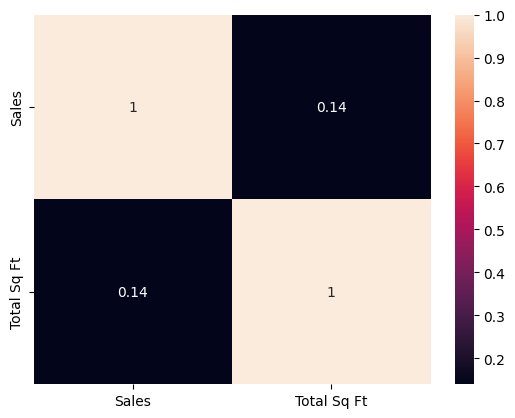

In [69]:
sns.heatmap(rel_df.corr(),annot = True)

In [75]:
import statsmodels.api as sm

model = sm.OLS(rel_df['Sales'], rel_df["Total Sq Ft"])


results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.701
Model:                            OLS   Adj. R-squared (uncentered):              0.701
Method:                 Least Squares   F-statistic:                          4.242e+05
Date:                Thu, 22 Jun 2023   Prob (F-statistic):                        0.00
Time:                        18:37:38   Log-Likelihood:                     -2.1212e+06
No. Observations:              181237   AIC:                                  4.242e+06
Df Residuals:                  181236   BIC:                                  4.242e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [77]:
from sklearn.linear_model import LinearRegression
y = rel_df["Total Sq Ft"]
y = np.reshape(y, (-1, 1))
X = rel_df['Sales']
X = np.reshape(X, (-1, 1))
model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0.00658123]]
Intercept: [6036.56451236]


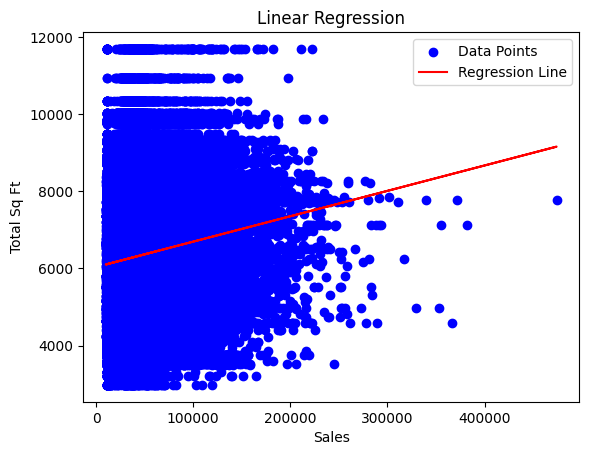

In [78]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.ylabel('Total Sq Ft')
plt.xlabel('Sales')
plt.title('Linear Regression')
plt.legend()

Which Super division is most profitable?

In [81]:
salesinfo = df.loc[:,["Super Division","Sales"]]
salesinfo

,Super Division,Sales
0,GIRLS,63635.80
1,BOYS,20872.93
2,ACCESSORIES,38717.03
3,KIDS,11455.00
4,GIRLS,67507.77
...,...,...
181232,BOYS,44711.93
181233,ACCESSORIES,33539.67
181234,KIDS,11648.04
181235,BOYS,11455.42


In [85]:
salesinfo.groupby("Super Division")["Sales"].sum()

Super Division
ACCESSORIES    1.821397e+09
BOYS           2.018241e+09
GIRLS          3.572426e+09
KIDS           7.401937e+08
Name: Sales, dtype: float64

<AxesSubplot: xlabel='Super Division'>

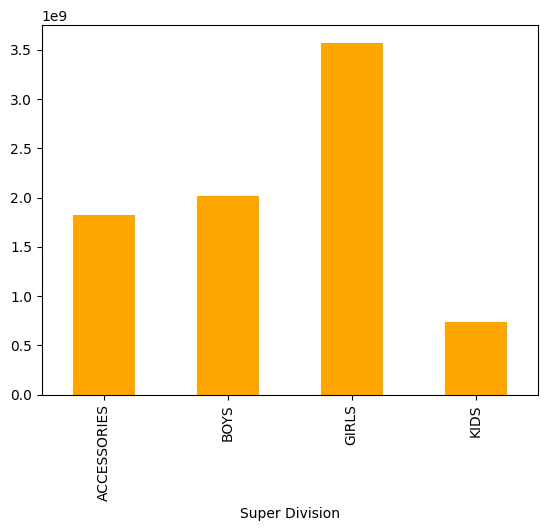

In [124]:
salesinfo.groupby("Super Division")["Sales"].sum().plot(kind = "bar",color = "orange")

How many stores are active as of today?

In [95]:
df[df["Store Close"] == "No Close date"]

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification,Store Open Year
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160575,691,2019,12,KIDS,10706.61,11762.37,2017-08-25,No Close date,Mall,D1,Moderate,6969.1,No RRE date,no change,2017
160576,691,2020,1,GIRLS,34186.58,23439.51,2017-08-25,No Close date,Mall,D1,Moderate,6969.1,No RRE date,no change,2017
160577,691,2020,1,BOYS,23834.57,19112.20,2017-08-25,No Close date,Mall,D1,Moderate,6969.1,No RRE date,no change,2017
160578,691,2020,1,ACCESSORIES,18026.62,14982.47,2017-08-25,No Close date,Mall,D1,Moderate,6969.1,No RRE date,no change,2017


In [98]:
df[df["Store Close"] == "No Close date"]['Store'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

In [99]:
len(df[df["Store Close"] == "No Close date"]['Store'].unique())

678

In [101]:
print(len(df[df["Store Close"] == "No Close date"]['Store'].unique()), " stores are active as of today.")

678  stores are active as of today.


Which super division has more sq. ft on an average across all the stores?

In [106]:
df.groupby("Super Division")["Total Sq Ft"].sum()

Super Division
ACCESSORIES    288658014.3
BOYS           288467630.9
GIRLS          288276180.7
KIDS           282298872.8
Name: Total Sq Ft, dtype: float64

In [107]:
total = sum(df.groupby("Super Division")["Total Sq Ft"].sum())
df.groupby("Super Division")["Total Sq Ft"].sum()/total

Super Division
ACCESSORIES    0.251510
BOYS           0.251344
GIRLS          0.251177
KIDS           0.245969
Name: Total Sq Ft, dtype: float64

<AxesSubplot: xlabel='Super Division'>

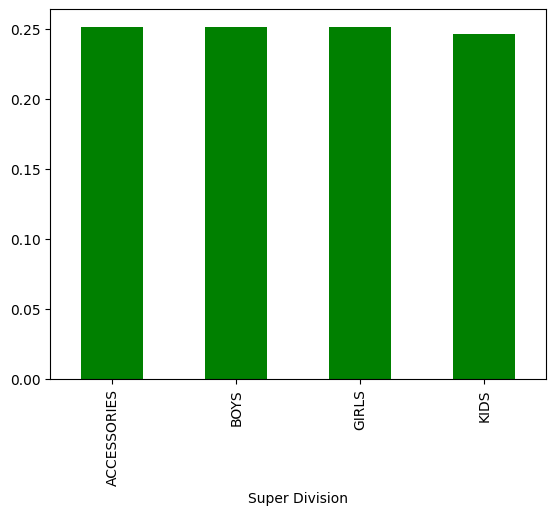

In [121]:
(df.groupby("Super Division")["Total Sq Ft"].sum()/total).plot(kind = "bar",color = "green")